## Workflow Project Design

### Description - Personality classification

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)


This dataset contains over 8600 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))


### 7 Questions :

- Q1: What do we want to predict? How will a good prediction improve a key performance indicator (KPI) or lead to a scientific result?
- Q2: How do we measure the quality or value of the prediction in the selected business or science problem? What will be the quantitative score? How does the quantitative score reflect the quality or value of the prediction? How does the (possibly asymmetric) prediction error convert into cost or decreased KPI?
- Q3: Will the predictor be used as decision support, as a part of a fully automated system, or only as part of a report or feasibility study? How will an agent use the system?
- Q4: What data do we need to develop a predictor? Could you find this data? What were the actual data sources? What other sources (private or public) could be exploited? What were and would be the data collection costs?
- Q5: What data cleaning/tidying steps were required to obtain clean training data?
- Q6: Given the data source(s) and the prediction goal, what is the workflow and the workflow elements? Will you need different expertise for the different steps?
- Q7: How fast the phenomena underlying the prediction problem change? How often the model will have to be retrained? What are the associated costs and risks?

### Q1 What to predict?
The model aim to predict the type of personality based on his comments. The data has 16 labels representing 16 type of personalities.<br/>
A good prediction which implies the features, will help us better understand the correlation between the speech and personality in a statistical significance.

### Q2 
We have the accuracy of prediction where only when the personality is correctly predicted is scored as 1. Also, since the personality is defined across 4 axis:<br/>
Introversion (I) – Extroversion (E)<br/>
Intuition (N) – Sensing (S)<br/>
Thinking (T) – Feeling (F)<br/>
Judging (J) – Perceiving (P)<br/>,
the prediction can be scored by each aixs. In another word, if there is one axis correctly predicted, we give a 0.25 score.<br/>
The two scores descripted above are defined by an identity matrix and a soft score matrix where non diagonal elements are non-zero.<br/>
The prediction error leads to a erronous judgement of personality, and then leads to other problems in application, for example, unreasonable utilisation of humain resource.

### Q3
The prediction system might be applied in psychological research to help psychologists to know better the relationship between personlaity and their speech. Also, it can be applied in humain resource department to allocation suitable tasks to each person.

### Q4.1 What data do we need to develop a predictor? Could you find this data?

The data we need for developping a predictor can be found profoundly on the website. 
One example is the kaggle: https://www.kaggle.com/laowingkin/mbti-study-personality
Other data can be equivalently scrapped from the web, the only difficulty is the label

### Q4.2 What were the actual data sources? What other sources (private or public) could be exploited? 

Unlabeled data could be easily exploited.

### Q4.3 What were and would be the data collection costs?

very little cost for posts (scrappers, ect.). Yet the labels could be expansive to get.


### Q5: What data cleaning/tidying steps were required to obtain clean training data?

The special steps depend on the demand of classifiers, but generally we need the following steps to import, split, clean, stem, and feature engineer. 

We will go through the basics for doing data analysis, and then create a framework for general data analysis tasks.

To be more specific:
 
- data import, replace some special symbols, or fillna
- data storage, feature extraction and clean (here we also list several possibilities like the stem of words, the word to graph function, the vectorization of words, ect.)
- statistical analysis (analyse statistique)

this is an example for non time series data.



### Q6
The main workflow includes 'feature extraction' and 'classfier'. In terms of the steps of baseline', we need to design the different accracy functions and the reasonable cross-validation algorithm to make sure the comparison of the machine learning methods is just.

Actually, considering the content of dataset, we need to know some basic knowledge of psychology. For the 'feature extraction' step, the main expertise is Natural language processing. For the 'classier' step, we need apply all kinds of methods of machine learning.

### Q7
Actually, with the development of the society, the distribution of personality and even the personality of a certain person have a great variation. What's more, the content of dataset is the last 50 things posted of even person. As a result, considering the changement of popular network vocabulary, the dataset changes at a high speed. 

Considering all facts, we suggest to update the dataset each month.

Because it is not a on-line problem, the cost would be not so expensive. However, while updating the content of dataset, we need to consider the risk of the personality's change(label's change).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Overview of the data

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Unnamed: 0,type,posts
0,6797,INTJ,Arose|||Smear|||Thick|||Clamp|||Claim|||Manic|...
1,7668,INTP,'I usually act or more specifically speak befo...
2,4321,INFP,'https://www.youtube.com/watch?v=GhOQngecTGU||...
3,4164,ENFP,'I really like languages too and that's why I'...
4,1038,INTP,"'That is what I want to do, but that would mak..."


#### The features of the posts

In [4]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,Unnamed: 0,type,posts,words_per_comment,variance_of_word_counts
0,6797,INTJ,Arose|||Smear|||Thick|||Clamp|||Claim|||Manic|...,10.30,176.801600
1,7668,INTP,'I usually act or more specifically speak befo...,30.64,50.795600
2,4321,INFP,'https://www.youtube.com/watch?v=GhOQngecTGU||...,23.06,190.973291
3,4164,ENFP,'I really like languages too and that's why I'...,17.10,178.153600
4,1038,INTP,"'That is what I want to do, but that would mak...",30.50,122.569600


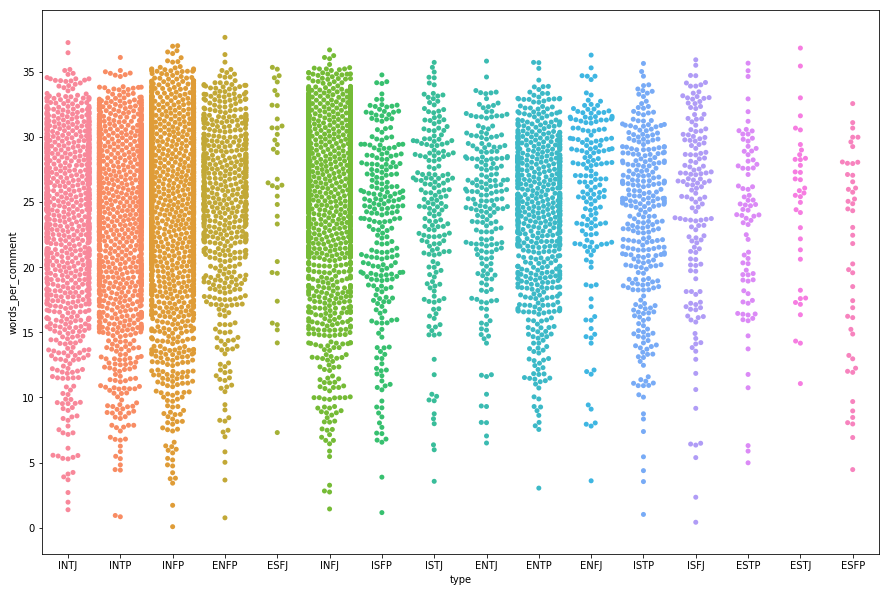

In [5]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)
plt.show()

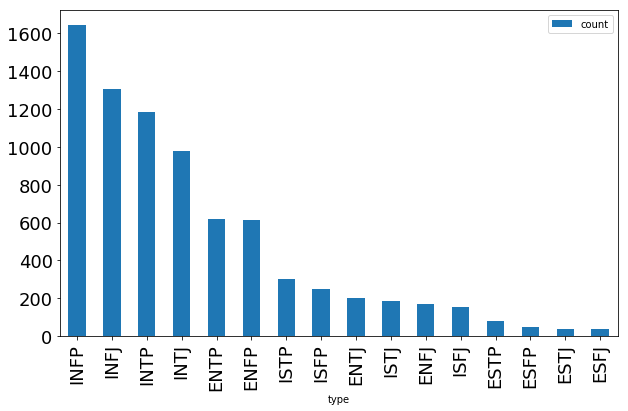

In [6]:
df.groupby('type').count()[['posts']].rename(
    columns={'posts': 'count'}).sort_values(
    'count', ascending=False).reset_index().plot.bar(
        x='type', y='count', figsize=(10, 6), fontsize=18);
plt.show()

#### The word cloud analysis

In [11]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,8*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

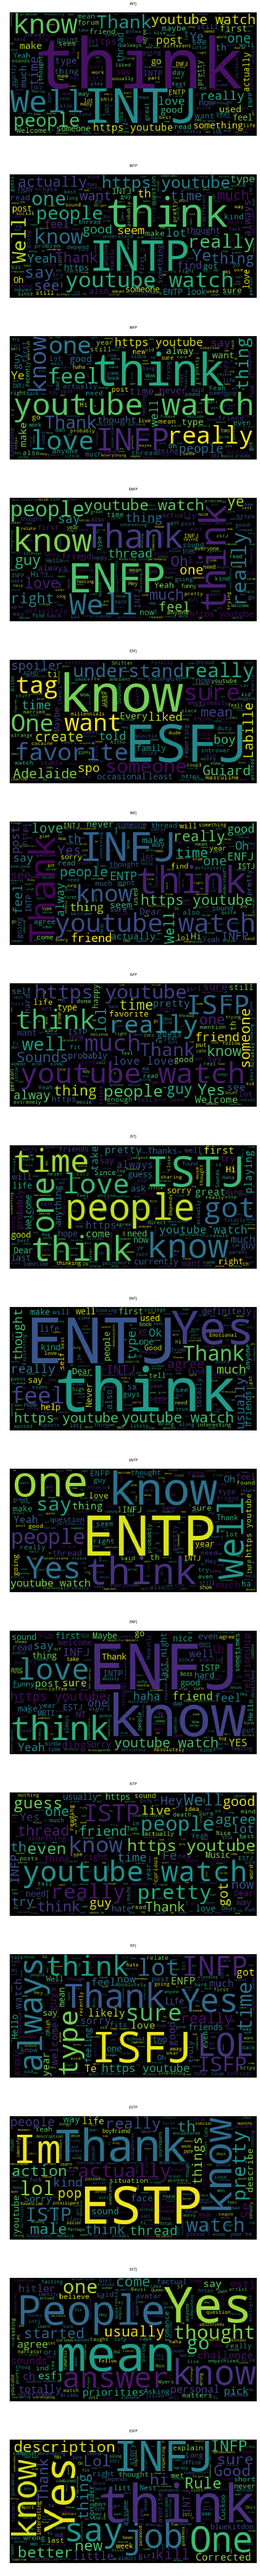

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
plt.show()

### Results

![result](result.png)

### Feature Extractor
In our model, we only consider the context and words each person talks about, and don't consider the way and phrases he talks. Thus, word frequency is the main feature we focus on. We tokenize the documents by punctuations and then applied Snowball Stemmer to stem the words. Considering the documents includs many website addresses, we add 'www' and 'http' to the stop words.
### Classifier
After trying different models on part of the data, we found that XGBClassifier gives the best prediction accuracy. <br/>
As an ensemble method, gradient boosting decision tree can train the model faster and give a good results in our case.
